# Predicting a Song's Success using Machine Learning - Pt. 2

![mozart](images/sheet.jpg)

## Author: [Patricio Contreras](https://www.linkedin.com/in/pcontreras97/)

## Overview

This section of the project is concerned with selecting and training machine learning (ML) algorithms with the data worked in the previous [notebook](EDA.ipynb).  Once we choose our ML algorithms we wish to work with, we'll fit a baseline model (all variables, no hyperparameter tuning, etc.) for each algorithm and record performance results.  After obtaining the baseline results, we will see how tweaking certain properties such as the hyperparameters can affect our model's performance.

After all models have been assessed, the one with the best predictive performance will be chosen.

### Importing the Data:

In [1]:
# importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading in the data frame from EDA notebook
df = pd.read_csv("data/df.csv")

df.head()

,danceability,energy,key,loudness,is_Major,speechiness,acousticness,instrumentalness,liveness,Positivity,tempo,duration_ms,time_signature,chorus_hit,is_Hit
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,1
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,0


In [2]:
# dimensions
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 40686
Number of columns: 15


As seen by the output above, we are working with the same data frame we left off our EDA and Data Cleaning section.

Before moving forward, a quick refresher on what each column represents:

- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C#/Db, 2 = D, and so on. If no key was detected, the value is -1.

- **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
		   
- **is_Major**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
	
- **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:
	
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
	
- **Positivity**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
	
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
	
- **duration_ms**: 	The duration of the track in milliseconds.
	
- **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
	
- **chorus_hit**: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track (in milliseconds). This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.
	
- **is_Hit**: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' implies that the track is a 'flop'.

## Baseline Modelling

The ML algorithms chosen for this project are: Logistic Regression, K-Nearest Neighbours (KNN), Random Forest, and Gradient Boosting.  One way to assess how well the model does on unseen data is by performing a 70-30 train/test split of our data.  Furthermore, the evaluation metrics recorded after we train each model will be: accuracy, F1 score, and AUC.  ROC curves will also be plotted showing the relationship between the false positive rate and the true positive rate.

We'll start off by creating baseline models with our data stored in `df`:

In [3]:
# importing necessary functions from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Logistic Regression
baseline_logreg = LogisticRegression(fit_intercept = False, solver = "liblinear", 
                                     random_state = 42)

# KNN
baseline_knn = KNeighborsClassifier()

# Random Forest
baseline_rf = RandomForestClassifier(random_state = 42)

# Gradient Boosting
baseline_gb = GradientBoostingClassifier(random_state = 42)

With the exception of `fit_intercept`, `solver`, and `random_state`, all other hyperparameters use their default values.  This means that the Logistic Regression classifier will have `C` = 1, the KNN classifier will use `n_neighbours` = 5, the Random Forest classifier will have 100 decision trees, and the GBoost classifier will have a `learning_rate` of 0.1.

### Train-test split and Data Scaling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# target variable
y = df["is_Hit"]
# predictors
X = df.drop("is_Hit", axis = 1)
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Since KNN is a distance-based classifier, if data is in different scales, 
# then larger scaled features have a larger impact on the distance between points.
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)
scaled_df_train = pd.DataFrame(scaled_data_train, columns = X.columns)
scaled_df_test = pd.DataFrame(scaled_data_test, columns = X.columns)

### Train Baseline Models

In [5]:
from Code.simulations import simulate
# store train/test evaluation metrics here
acc_scores = []
f1_scores = []
roc_scores = {}
auc_scores = {}

# name of algorithm, classifier instance
baseline_algs = [("Logistic\nRegression", baseline_logreg), 
                 ("KNN", baseline_knn),
                 ("Random Forest", baseline_rf),
                 ("GBoost", baseline_gb)]

# train each model, store results
for name, clf in baseline_algs:
    if name != "KNN":
        results, roc = simulate(clf, X_train, X_test, y_train, y_test, True)
        # STORE ACCURACY
        acc_scores.append([name, results[0], "Baseline Train"])
        acc_scores.append([name, results[1], "Baseline Test"])
        # # STORE F1 SCORE
        f1_scores.append([name, results[2], "Baseline Train"])
        f1_scores.append([name, results[3], "Baseline Test"])
        # STORE ROC and AUC
        roc_scores[name] = roc
        auc_scores[name] = results[4]
    else:
        results, roc = simulate(clf, scaled_df_train, scaled_df_test, 
                                y_train, y_test, True)
        # STORE ACCURACY
        acc_scores.append([name, results[0], "Baseline Train"])
        acc_scores.append([name, results[1], "Baseline Test"])
        # # STORE F1 SCORE
        f1_scores.append([name, results[2], "Baseline Train"])
        f1_scores.append([name, results[3], "Baseline Test"])
        # STORE ROC and AUC
        roc_scores[name] = roc
        auc_scores[name] = results[4]

### Baseline Model Evaluations:

We now have trained each baseline model and calculated accuracy scores, F1 scores, ROC curves, and AUCs.  Rather than outputting a table with all the results, let's visualise the results by plotting some useful bar charts:

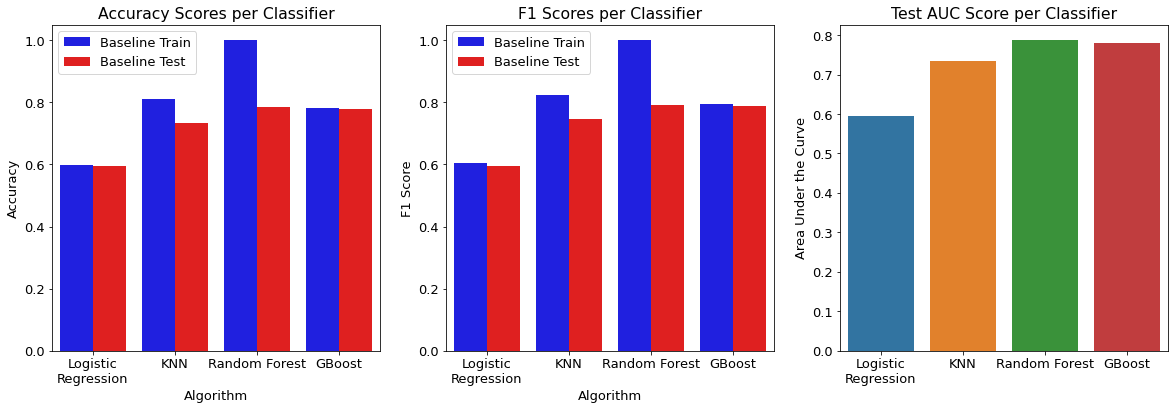

In [6]:
# creating data frames of the results obtained
df_baseline_acc = pd.DataFrame(acc_scores, columns = ["Algorithm", "Accuracy", "Type"])
df_baseline_f1 = pd.DataFrame(f1_scores, columns = ["Algorithm", "F1 Score", "Type"])
df_baseline_auc = pd.DataFrame(auc_scores, index = [0])

plt.rcParams["font.size"] = 13

fig, ax = plt.subplots(1,3, figsize = (20,6))
sns.barplot(x = "Algorithm", y = "Accuracy", hue = "Type",
           data = df_baseline_acc, palette = ["b", "r"], ax = ax[0])
ax[0].set_title("Accuracy Scores per Classifier")
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc = "upper left")

sns.barplot(x = "Algorithm", y = "F1 Score", hue = "Type",
           data = df_baseline_f1, palette = ["b", "r"], ax = ax[1])
ax[1].set_title("F1 Scores per Classifier")
ax[1].set_ylabel("F1 Score")
ax[1].legend(loc = "upper left")

sns.barplot(x = df_baseline_auc.columns, y = df_baseline_auc.iloc[0],
           ax = ax[2])
ax[2].set_title("Test AUC Score per Classifier")
ax[2].set_ylabel("Area Under the Curve");

After reviewing the plots above, the important takeaways are:

* The classifier with the largest difference between training and test performance is Random Forest.  Given its impeccable performance on the training set, it seems this classifier *overfitted*

* The best performing classifier in terms of AUC is Random Forest with a value close to 0.8

* As far as test performance goes, Random Forest and GBoost are the best

* Logistic Regression is the worst-performing classifier out of the 4

Now that we've reviewed our evaluation metrics, let's take a look at the ROC curves for each classifier:

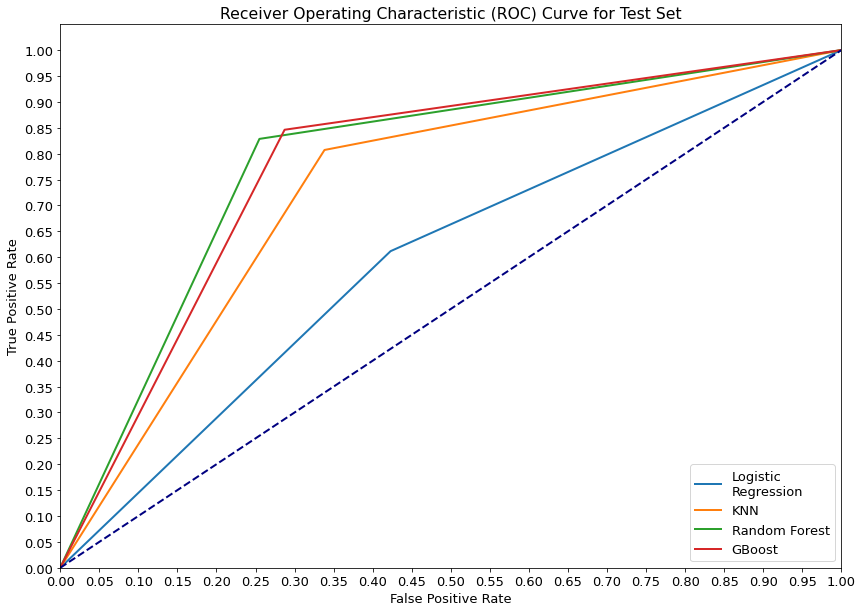

In [7]:
from Code import performance as pfm

plt.figure(figsize = (14,10))

pfm.plot_roc(roc_scores)

All of the models lie above the dashed blue line which means they're better than a "worthless", 50-50 accuracy classifier.  As seen in the AUC bar chart before, the Random Forest and Gradient Boost classifiers are the best out of the four.

---

Now that we've trained our baseline models and recorded the evaluation metrics, we are now ready to try and optimise each model!

## Optimising the Logistic Regression Classifier

In [8]:
# target
y = df["is_Hit"]
# predictors (cleaned)
X = df.drop("is_Hit", axis = 1)
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Selecting the Best Features using RFE

The first step we'll take at optimising our Logistic Regression classifier is choose the best features from our `df` data frame.  While there are several different techniques used for feature selection, we'll use Recursive Feature Elimination (RFE).  This method repeatedly constructs logistic regression models, evaluates performance, and eliminates features if necessary.

In [9]:
from sklearn.feature_selection import RFECV

rfe = RFECV(LogisticRegression(fit_intercept = False, C = 1e12, solver = "liblinear", 
                               random_state = 42), cv = 5)
X_rfe_train = rfe.fit_transform(X_train, y_train)
X_rfe_test = rfe.transform(X_test)

print("The optimal number of features is: ", rfe.n_features_)
print("\n")
print("The chosen features are:", list(X.columns[rfe.support_]))

The optimal number of features is:  12


The chosen features are: ['danceability', 'energy', 'key', 'loudness', 'is_Major', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'Positivity', 'tempo', 'time_signature']


Using RFE, we were able to reduce the number of features from 14 to 12.  Now that we have the optimal number of features according to RFE, let's test for significance.

### Checking for Predictor Significance

Now that we have a smaller subset of features from RFE, let's verify all of them are statistically significant.  We'll do this by fitting a Logistic Regression model using `statsmodels`:

In [10]:
import statsmodels.api as sm

df_rfe_train = pd.DataFrame(X_rfe_train, columns = X.columns[rfe.support_])

log_rfe_model = sm.Logit(list(y_train), df_rfe_train).fit()

log_rfe_model.summary()

Optimization terminated successfully.
         Current function value: 0.529291
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28480
Model:                          Logit   Df Residuals:                    28468
Method:                           MLE   Df Model:                           11
Date:                Sun, 09 Oct 2022   Pseudo R-squ.:                  0.2364
Time:                        17:17:42   Log-Likelihood:                -15074.
converged:                       True   LL-Null:                       -19741.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         3.2679      0.106     30.902      0.000       3.061       3.475
energy              -2.0012      0.106    -18.790      0.000      -2.210      -1.792
key                  0.0133      0.004      3.352      0.001       0.006       0.021
loudness             0.1089      0.005     23.065      0.000       0.100       0.118
is_Major             0.3931      0.031     12.683      0.000       0.332       0.454
speechiness         -3.2643      0.191    -17.063      0.000      -3.639      -2.889
acousticness        -1.3777      0.058    -23.628      0.000      -1.492      -1.263
instrumentalness    -3.3650      0.080    -41.965      0.000      -3.522      -3.208
liveness            -0.1936      0.083     -2.323      0.020      -0.357      -0.030
Positivity           0.4417      0.069      6.395      0.000       0.306       0.577
tempo                0.0021      0.000      4.436      0.000       0.001       0.003
time_signature       0.1870      0.028      6.641      0.000       0.132       0.242
====================================================================================
"""

The p-values for all the predictor variables are smaller than 0.05, therefore we will keep all of the features returned by RFE.

### Finding the Best Inverse Regularization Parameter

Having looked at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for scikit-learn's Logistic Regression, a key parameter that should influence our results is `C`, the "inverse of regularization strength".  Our baseline logistic regression classifier used a small value of 1 which means there was strong regularization.

In this section, we will train many Logistic Regression classifiers with different inverse regularization values and observe how model performance changes:

In [11]:
# range of possible C values
C = np.linspace(1, 10000)
# store train/test scores
acc_train_scores = []
acc_test_scores = []
f1_train_scores = []
f1_test_scores = []
auc_scores = []

for c in C:
    lr = LogisticRegression(C = c, fit_intercept = False, random_state = 42,
                           solver = "liblinear")
    results = simulate(lr, X_rfe_train, X_rfe_test, y_train, y_test)
    
    acc_train_scores.append(results[0])
    acc_test_scores.append(results[1])
    f1_train_scores.append(results[2])
    f1_test_scores.append(results[3])
    auc_scores.append(results[4])

Now that we've trained several logistic regression models with different regularization parameters, let's visualise the results between training and test sets:

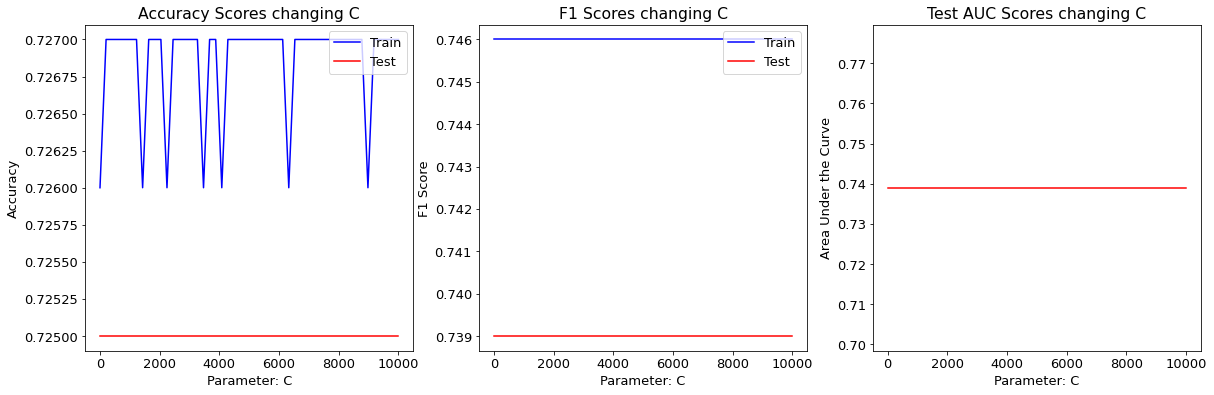

In [12]:
stats = [acc_train_scores, acc_test_scores, 
         f1_train_scores, f1_test_scores,
        auc_scores]

fig, ax = plt.subplots(1,3, figsize = (20,6))

pfm.perform_visualisation(C, stats, ax, "C")

The results shown above can be summarised as follows:

* Training and test accuracy are remarkably close

* Training and test F1 scores do not change regardless of `C`

* Test AUC stays the same at around 0.74

* Even though `C` did not really change our model's performance too much, **RFE and checking for predictor significance increased our model's performance overall (accuracy, F1, AUC) compared to the baseline**

### Final Logistic Regression Model

After choosing the most important features through RFE and assessing the effect `C` has on our Logistic Regression model, the final classifier will have the final characteristics:

* The 12 features used to predict `is_Hit` will be: `danceability`, `energy`, `key`, `loudness`, `is_Major`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `Positivity`, `tempo`, and `time_signature`

* A large value of 1e12 will be used for C.  This way our model is not under strong regularization.

In [13]:
final_log = LogisticRegression(fit_intercept = False, C = 1e12, solver = "liblinear",
                              random_state = 42)
log_stats, log_roc = simulate(final_log, X_rfe_train, X_rfe_test, y_train, y_test,
                             roc = True)

## Optimising the KNN Classifier

In [14]:
# target
y = df["is_Hit"]
# predictors (cleaned)
X = df.drop("is_Hit", axis = 1)
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Probably one of the most important parameters used in KNN is, well, `k` (the number of neighbours to check).  Changing this value can affect the model's results since the algorithm will check for more (or less) neighbours in order to determine the class (0-1).  Similar to what we did in the Logistic Regression section above, here we'll see how model performance improves (or worsens) as we change `k`.

### Scaling the Data

Recall that KNN is a distance-based classifier.  This means that features with larger scales have a bigger impact on the distance between points.  To remedy this, we'll normalise our data:

In [15]:
# scale data since we're working with KNN
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)
scaled_df_train = pd.DataFrame(scaled_data_train, columns = X_train.columns)
scaled_df_test = pd.DataFrame(scaled_data_test, columns = X_test.columns)

### Finding the Best Number of Neighbours: `k`

Now that we've normalised our training and test data and checked for high correlations between variables, we'll proceed like we did in the Logistic Regression section: fit several KNN classifiers with different values for `k`, calculate predictions, store results, and visualise.

In [16]:
# range of possible k values
K = np.arange(1, 26, 2)
# store train/test scores
acc_train_scores = []
acc_test_scores = []
f1_train_scores = []
f1_test_scores = []
auc_scores = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    results = simulate(knn, scaled_df_train, scaled_df_test, 
                       y_train, y_test)
    
    acc_train_scores.append(results[0])
    acc_test_scores.append(results[1])
    f1_train_scores.append(results[2])
    f1_test_scores.append(results[3])
    auc_scores.append(results[4])

Let's visualise the results:

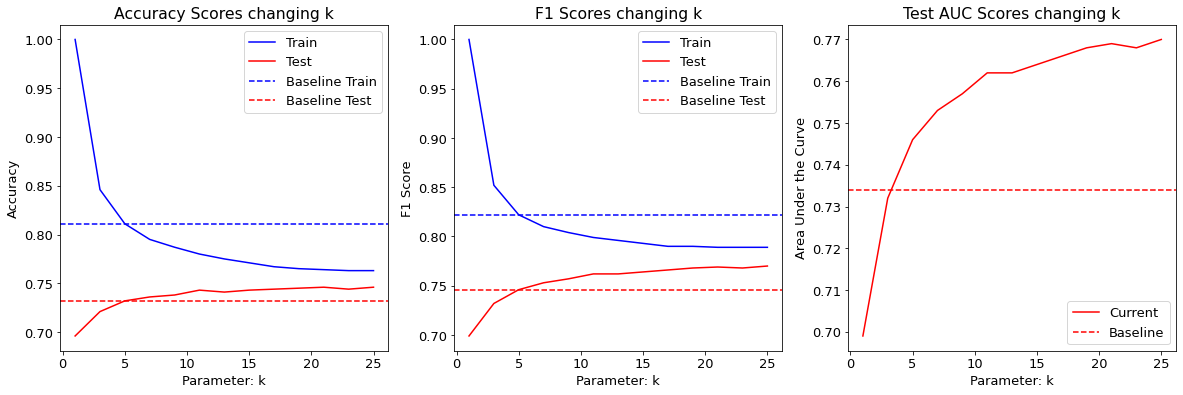

In [17]:
fig, ax = plt.subplots(1,3, figsize = (20,6))

stats = [acc_train_scores, acc_test_scores, 
         f1_train_scores, f1_test_scores,
        auc_scores]

pfm.perform_visualisation(K, stats, ax, "k")

ax[0].axhline(y = df_baseline_acc.loc[2,"Accuracy"], color = "b", 
              ls = "--")
ax[0].axhline(y = df_baseline_acc.loc[3,"Accuracy"], color = "r", 
              ls = "--")
ax[0].legend(["Train", "Test", "Baseline Train", "Baseline Test"], 
             loc = "upper right")

ax[1].axhline(y = df_baseline_f1.loc[2,"F1 Score"], color = "b", 
              ls = "--")
ax[1].axhline(y = df_baseline_f1.loc[3,"F1 Score"], color = "r", 
              ls = "--")
ax[1].legend(["Train", "Test", "Baseline Train", "Baseline Test"], 
             loc = "upper right")

ax[2].axhline(y = float(df_baseline_auc["KNN"]), color = "r", ls = "--")
ax[2].legend(["Current", "Baseline"], 
             loc = "lower right");

The results shown above can be summarised as follows:

* Considering k = 5 in the baseline KNN model, test accuracy, F1 score, and AUC increased as we increased the number of neighbours `k`

* Both accuracy and F1 scores converge as we increase `k`

* A high value of `k` (> 5) is recommended as this value would surpass baseline accuracy, F1, and AUC scores

### Final KNN Model

The final KNN model will have the following characteristics:

* Take in all variables (scaled) as predictors

* Have `n_neighbours` (k) = 25

In [18]:
final_KNN = KNeighborsClassifier(n_neighbors = 25)
knn_stats, knn_roc = simulate(final_KNN, scaled_df_train, scaled_df_test, 
                              y_train, y_test, roc = True)

## Optimising the Random Forest Classifier

In [19]:
# target
y = df["is_Hit"]
# predictors (cleaned)
X = df.drop("is_Hit", axis = 1)
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Selecting the Best Features using RFE

Once again, we will try to select the most important features using RFE.  This way we don't have to deal with a "large" number of variables and only focus on the ones that matter the most:

In [20]:
rfe = RFECV(RandomForestClassifier(random_state = 42), cv = 5)
X_rfe_train = rfe.fit_transform(X_train, y_train)
X_rfe_test = rfe.transform(X_test)

print("The optimal number of features is: ", rfe.n_features_)
print("\n")
print("The chosen features are:", list(X.columns[rfe.support_]))

The optimal number of features is:  14


The chosen features are: ['danceability', 'energy', 'key', 'loudness', 'is_Major', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'Positivity', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit']


This time the number of features did not change.  All of the features will be used to train our Random Forest classifier.

### Using Grid Search

Random Forest is a machine learning algorithm with several hyperparameters that can influence the predictive power of your model.  Unlike Logistic Regression or KNN, random forest is considered an ensemble method, which means it is a collection of decision trees working together to predict the target variable.  For this section of the project, we'll focus on three very important parameters: `criterion`, `n_estimators`, and `max_depth`.  However, rather than manually creating several classifiers with different values for each parameter like we did before, we'll take advantage of scikit-learn's `GridSearchCV`.  This function performs an exhaustive search of the best parameter value combination given an input parameter grid.

In [21]:
# defining parameter grid
rf_param_grid = {"criterion": ["gini", "entropy"],
                 "n_estimators": [100, 500, 1000],
                 "max_depth": [None, 5, 10, 20, 25]}

In [22]:
from sklearn.model_selection import GridSearchCV
# takes a long time to run, just gotta wait patiently...
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), rf_param_grid,
                         cv = 3)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 25],
                         'n_estimators': [100, 500, 1000]})

Now that we've run `GridSearchCV`, let's see what the resulting "optimal" parameter values are and calculate our evaluation metrics:

In [23]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

y_hat_train = rf_grid_search.predict(X_train)
y_hat_test = rf_grid_search.predict(X_test)

rf_acc_train = accuracy_score(y_train, y_hat_train)
rf_acc_test = accuracy_score(y_test, y_hat_test)

rf_f1_train = f1_score(y_train, y_hat_train)
rf_f1_test = f1_score(y_test, y_hat_test)

fpr, tpr, thresh = roc_curve(y_test, y_hat_test)
rf_auc_test = auc(fpr, tpr)

print(f"Optimal Parameters: {rf_grid_search.best_params_}")
print("")
print(f"Training Accuracy: {rf_acc_train :.2%}")
print(f"Test Accuracy: {rf_acc_test :.2%}")
print("-----------------")
print(f"Training F1 Score: {rf_f1_train :.2%}")
print(f"Test F1 Score: {rf_f1_test :.2%}")
print("-----------------")
print(f"Testing AUC: {rf_auc_test :.2%}")

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 1000}

Training Accuracy: 99.97%
Test Accuracy: 79.04%
-----------------
Training F1 Score: 99.97%
Test F1 Score: 79.70%
-----------------
Testing AUC: 79.19%


The results above can be summarised as follows:

* Compared to our baseline Random Forest classifier, the optimal `criterion` and `n_estimators` has changed

* Despite RFE and an exhaustive cross-validated Grid Search, the algorithm still seems to overfit the data as shown by the high training scores

* Test scores *did* improve ever so slightly compared to our baseline Random Forest

### Final Random Forest Model

The final Random Forest model will have the following characteristics:

* have `criterion` set to "entropy"
* leave `max_depth` with its default value of **None**
* have `n_estimators` equal to 1,000
* use all of the features available in `df`

In [24]:
final_rf = RandomForestClassifier(criterion = "entropy", n_estimators = 1000,
                                 random_state = 42)
rf_stats, rf_roc = simulate(final_rf, X_train, X_test, y_train, 
                            y_test, roc = True)

## Optimising the Gradient Boost Classifier

In [25]:
# target
y = df["is_Hit"]
# predictors (cleaned)
X = df.drop("is_Hit", axis = 1)
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Feature Selection with RFE

In [26]:
rfe = RFECV(GradientBoostingClassifier(random_state = 42), cv = 5)
X_rfe_train = rfe.fit_transform(X_train, y_train)
X_rfe_test = rfe.transform(X_test)

print("The optimal number of features is: ", rfe.n_features_)
print("\n")
print("The chosen features are:", list(X.columns[rfe.support_]))

The optimal number of features is:  14


The chosen features are: ['danceability', 'energy', 'key', 'loudness', 'is_Major', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'Positivity', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit']


Once again, RFE did not eliminate any features.

### Finding the Best Parameter Combination with Grid Search

The parameters used in Gradient Boost are very similar to Random Forest.  Therefore, the parameter grid we define will look very similar to the one created in the previous section:

In [27]:
# defining parameter grid
gb_param_grid = {"learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
                 "max_depth": [3, 5, 10, 20, 25]}

In [28]:
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 42), gb_param_grid,
                             cv = 3)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 5, 10, 20, 25]})

Now that we've run `GridSearchCV`, let's see what the resulting "optimal" parameter values are and calculate our evaluation metrics:

In [29]:
y_hat_train = gb_grid_search.predict(X_train)
y_hat_test = gb_grid_search.predict(X_test)

gb_acc_train = accuracy_score(y_train, y_hat_train)
gb_acc_test = accuracy_score(y_test, y_hat_test)

gb_f1_train = f1_score(y_train, y_hat_train)
gb_f1_test = f1_score(y_test, y_hat_test)

fpr, tpr, thresh = roc_curve(y_test, y_hat_test)
gb_auc_test = auc(fpr, tpr)

print(f"Optimal Parameters: {gb_grid_search.best_params_}")
print("")
print(f"Training Accuracy: {gb_acc_train :.2%}")
print(f"Test Accuracy: {gb_acc_test :.2%}")
print("-----------------")
print(f"Training F1 Score: {gb_f1_train :.2%}")
print(f"Test F1 Score: {gb_f1_test :.2%}")
print("-----------------")
print(f"Testing AUC: {gb_auc_test :.2%}")

Optimal Parameters: {'learning_rate': 0.15, 'max_depth': 5}

Training Accuracy: 82.18%
Test Accuracy: 78.37%
-----------------
Training F1 Score: 83.15%
Test F1 Score: 79.17%
-----------------
Testing AUC: 78.53%


The results above can be summarised as follows:

* Compared to our baseline Gradient Boost classifier, the learning rate *and* `max_depth` increased to 0.15 and 5, respectively

* Compared to our baseline, training scores improved more than test scores (for accuracy and F1)

* Test AUC also improved slightly

### Final Gradient Boost Classifier

The final Gradient Boost classifier will have the following characteristics:

* use all variables available in `df`
* have a `learning_rate` equal to 0.15
* `max_depth` value of 5

In [30]:
final_gb = GradientBoostingClassifier(learning_rate = 0.15, max_depth = 5,
                                     random_state = 42)
gb_stats, gb_roc = simulate(final_gb, X_train, X_test, y_train, 
                            y_test, roc = True)

## Final Results and Model Selection

Having gone through all the different algorithms and overall improved results, it is now time to choose our final model.  The visualisations below show the change in evaluation metrics between our baseline models and the final models:

In [31]:
algs = [("Logistic\nRegression", log_stats), 
                 ("KNN", knn_stats),
                 ("Random Forest", rf_stats),
                 ("GBoost", gb_stats)]
acc = []
f1 = []
aucs = []
for name, stat in algs:
    acc.append([name, stat[0], "Final Train"])
    acc.append([name, stat[1], "Final Test"])
    
    f1.append([name, stat[2], "Final Train"])
    f1.append([name, stat[3], "Final Test"])
    
    aucs.append([name, stat[4], "Final"])

# final results
df_acc = pd.DataFrame(acc, columns = ["Algorithm", "Accuracy", "Type"])
df_f1 = pd.DataFrame(f1, columns = ["Algorithm", "F1 Score", "Type"])
df_auc = pd.DataFrame(aucs, columns = ["Algorithm", "AUC", "Type"])

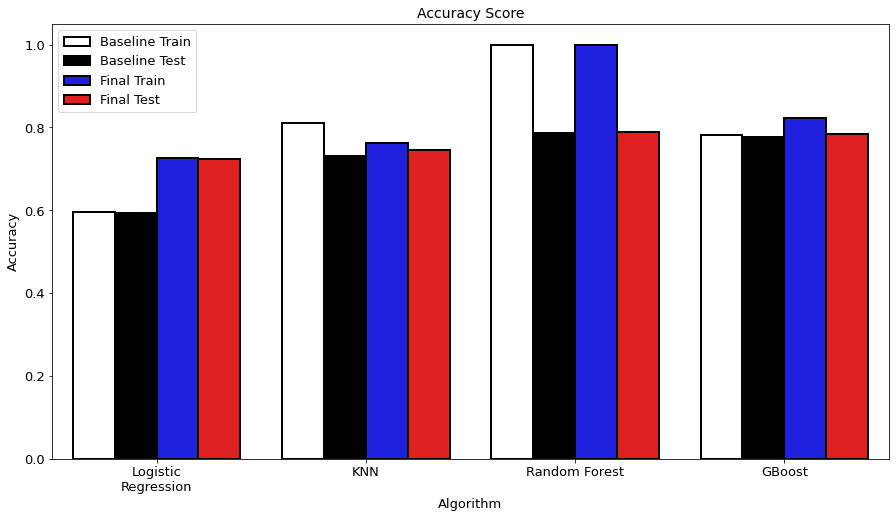

In [32]:
df_acc = pd.concat([df_baseline_acc, df_acc], axis = 0)

plt.figure(figsize = (15, 8))

sns.barplot(x = "Algorithm", y = "Accuracy", hue = "Type", 
            data = df_acc, palette = ["w", "black", "b", "r"],
           edgecolor = "black", linewidth = 2)
plt.legend(loc = "upper left")
plt.title("Accuracy Score", fontsize = 14);
#plt.savefig("./images/accuracy.png", dpi = 150, bbox_inches = "tight")

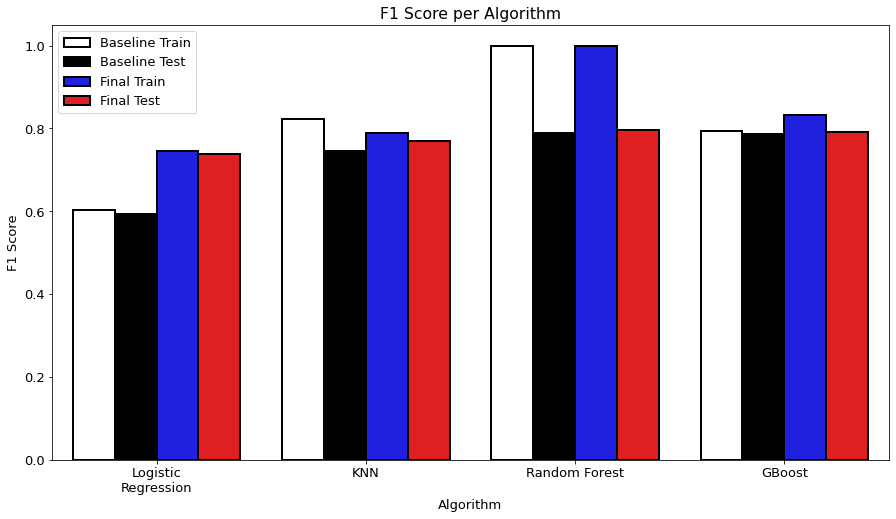

In [33]:
df_f1 = pd.concat([df_baseline_f1, df_f1], axis = 0)

plt.figure(figsize = (15, 8))

sns.barplot(x = "Algorithm", y = "F1 Score", hue = "Type", 
            data = df_f1, palette = ["w", "black", "b", "r"],
           edgecolor = "black", linewidth = 2)
plt.legend(loc = "upper left")
plt.title("F1 Score per Algorithm");
#plt.savefig("./images/f1.png", dpi = 150, bbox_inches = "tight")

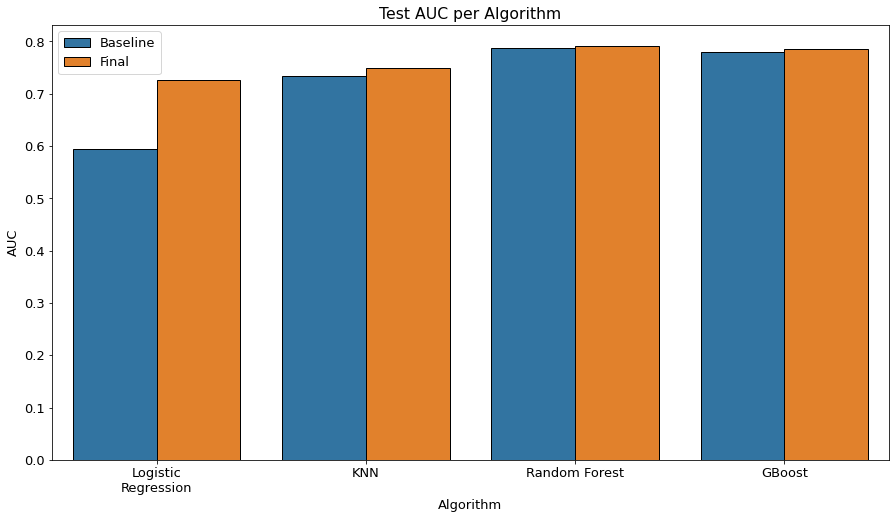

In [34]:
# creating a data frame to work with seaborn's barplot
df_baseline_auc = df_baseline_auc.T.reset_index()
df_baseline_auc.columns = ["Algorithm", "AUC"]
df_baseline_auc["Type"] = "Baseline"
df_auc = pd.concat([df_baseline_auc, df_auc], axis = 0)

plt.figure(figsize = (15, 8))

sns.barplot(x = "Algorithm", y = "AUC", hue = "Type", 
            data = df_auc, edgecolor = "black")
plt.legend(loc = "upper left")
plt.title("Test AUC per Algorithm");
#plt.savefig("./images/AUC.png", dpi = 150, bbox_inches = "tight")

The three plots above show us the difference in performance between the baseline model and the final.  Here are the most important points:

* Logistic Regression's performance improved quite a lot in all areas
* KNN's training accuracy and F1 score dropped but was compensated by increasing test scores.  The difference between training and test scores decreased
* Random Forest is the algorithm that didn't have much of a change in all areas.  Unfortunately, the model still overfits the training data
* Gradient Boost's training scores improved over 80% while test scores increased minimally.  Test AUC did increase too.

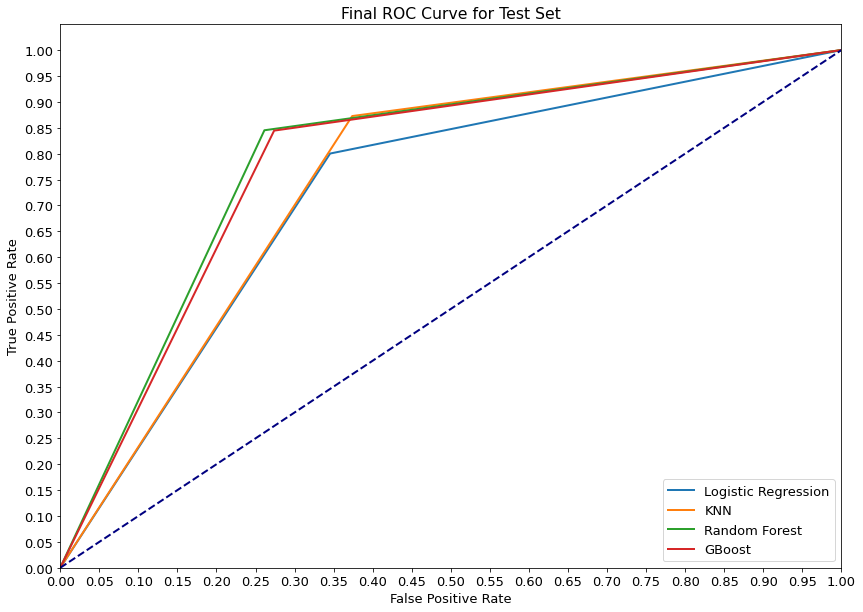

In [35]:
rocs = {"Logistic Regression": log_roc, "KNN": knn_roc, "Random Forest": rf_roc, "GBoost": gb_roc}

plt.figure(figsize = (14,10))

pfm.plot_roc(rocs)

plt.title("Final ROC Curve for Test Set");
#plt.savefig("./images/ROC.png", dpi = 150, bbox_inches = "tight")

### Choosing the Final Model

After reviewing all of the performance graphs shown above, Random Forest would seem like the best performing algorithm for this dataset and problem.  It excels in training scores (both accuracy and F1) and has the steepest ROC curve out of all the classifiers.  Furthermore, the fact that it's an ensemble method makes it robust to variance and feature selection.

**However**, the chosen model for this project will have to be **Gradient Boosting**.  This is precisely because of the Random Forest's stellar training performance.  The huge difference in training and test scores (for both accuracy and F1) suggest that Random Forest overfitted the training data and won't perform as well on unseen data.  In contrast, Gradient Boost has a smaller difference between training and test scores and has an AUC very close to Random Forest.  Even though Gradient Boosting did not do exceptionally well on the training data, the results obtained suggest that it's a more "balanced" algorithm than Random Forest.

Here are the raw results obtained from our Gradient Boost classifier:

In [36]:
# raw Gradient Boost scores:
print("Training Accuracy:", gb_stats[0])
print("Test Accuracy:", gb_stats[1])
print("--------------------")
print("Training F1 Score:", gb_stats[2])
print("Test F1 Score:", gb_stats[3])
print("--------------------")
print("Test AUC Score:", gb_stats[4])

Training Accuracy: 0.822
Test Accuracy: 0.784
--------------------
Training F1 Score: 0.832
Test F1 Score: 0.792
--------------------
Test AUC Score: 0.785
